### Linear Regression with Tensorflow

#### Erzeugen von Trainingsdaten

### Aufgaben

- Implementieren Sie in lineares Modell mit Tensorflow
 - Die Daten sollen durch den Feed-Mechanismus in den Graphen kommen. 
- Implementiern Sie eine Kostenfunktion (Quadrierte Abweichungen)
- Implementieren Sie das Gradientenabstiegsverfahren zur Minimierung der Kostenfunktion:
  - Verwenden Sie zur Berechnung des Gradienten `tf.gradients`. __Keine__ Verwendung von eingebauten Opmierungsalgorithmen, wie `tf.train.GradientDescentOptimizer`.
  - Optimieren Sie die Parameter aus Startwerten
  - Zeichnen Sie die gefundene Fit-Gerade zusammen mit den Daten
 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:

x_min = -10.
x_max = 10.
m = 10

training_data = np.random.uniform(x_min, x_max, m)
a = 10.
c = 4.
y_noise_sigma = 8.
labels = a + c * training_data + np.random.randn(len(training_data)) * y_noise_sigma


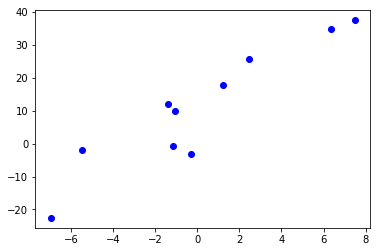

In [21]:
plt.plot(training_data, labels, "bo")

In [23]:
import tensorflow as tf

W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

init = tf.global_variables_initializer() # all variables need to be initialized like so
sess = tf.Session()
sess.run(init)

#print(sess.run(linear_model, {x:[1,2,3,4]}))

y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

'''
feed_dict = {x:[1,2,3,4], y:[0,-1,-2,-3]}
for i in range(10):
    gradientLoss = tf.gradients(loss, [W, b])
    alphaGradientLosses = tf.multiply(0.01, gradientLoss)

    computational_graph_update_W = tf.subtract(W, alphaGradientLosses[0])
    computational_graph_update_b = tf.subtract(b, alphaGradientLosses[1])

    newW = sess.run(computational_graph_update_W, feed_dict)
    #print(newW)
    #print(sess.run(W))

    newb = sess.run(computational_graph_update_b, feed_dict)
    #print(newb)
    #print(sess.run(b))

    sess.run(tf.assign(W, newW))
    sess.run(tf.assign(b, newb))

    print(sess.run(W))
    print(sess.run(b))
    
'''
    
#print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))
#help(tf.gradients)

def MyGradientDescent(alpha):
    def MyGDOptimizer(LossFunction):
        gradientLosses = tf.gradients(LossFunction, [W, b])
        alphaGradientLosses = tf.multiply(alpha, gradientLosses)

        newW = tf.subtract(W, alphaGradientLosses[0])
        newb = tf.subtract(b, alphaGradientLosses[1])
        return [newW, newb]
        #tf.assign(W, newW)
        #tf.assign(b, newb)
    return MyGDOptimizer

optimizer = MyGradientDescent(0.01)
training = optimizer(loss)

print(training_data)
print(labels)

for i in range(100):
    
    newParameters = sess.run(training, {x:training_data, y:labels})
    sess.run(tf.assign(W, newParameters[0]))
    sess.run(tf.assign(b, newParameters[1]))
    if i % 5 == 0:
        print(sess.run(W))
        print(sess.run(b))

print(sess.run([W, b]))


[ 2.4610727  -1.04258387 -1.13942403 -0.28337065 -1.40906336  1.23139394
 -5.49464107  7.49090919  6.37717856 -6.9813249 ]
[ 25.66926317  10.01205539  -0.56433859  -3.06102285  11.92994151
  17.71549385  -1.99148887  37.5284412   34.75957649 -22.5672505 ]
[ 13.79149532]
[ 1.94135237]
[-1568.54760742]
[-3.04808617]
[ 249510.921875]
[ 1708.28637695]
[-39591808.]
[-269544.5]
[  6.28243354e+09]
[ 42772916.]
[ -9.96897194e+11]
[ -6.78721843e+09]
[  1.58187739e+14]
[  1.07699660e+12]
[ -2.51012492e+16]
[ -1.70898124e+14]
[  3.98306856e+18]
[  2.71181100e+16]
[ -6.32033905e+20]
[ -4.30310918e+18]
[  1.00291237e+23]
[  6.82818043e+20]
[ -1.59142229e+25]
[ -1.08349527e+23]
[  2.52527131e+27]
[  1.71929027e+25]
[ -4.00710401e+29]
[ -2.72817664e+27]
[  6.35847591e+31]
[  4.32906400e+29]
[ -1.00896353e+34]
[ -6.86937570e+31]
[  1.60102433e+36]
[  1.09003270e+34]
[ nan]
[ nan]
[ nan]
[ nan]
[ nan]
[ nan]
[array([ nan], dtype=float32), array([ nan], dtype=float32)]


In [4]:
t = tf.Variable([[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]])
print(sess.run(tf.shape(t)))
print(sess.run(tf.rank(t)))

NameError: name 'tf' is not defined